In [2]:
%%javascript
// Notebook style configuration
require.config({paths: {toc: "//rawgit.com/rweigel/js-rsw/master/jupyter/toc"}});require(["toc"]);

<IPython.core.display.Javascript object>

In [3]:
!pip install hapiclient

In [13]:
# Notebook plot style configuration (not working with jupyter notebook distributed with Python 3.7/Anaconda - 
# page goes mostly blank)
#%config InlineBackend.figure_format = 'svg'

# Show plots in page instead of opening a window
%matplotlib inline

The Heliophysics Application Programmer’s Interface (HAPI) data access specification is a RESTful API and streaming format specification for delivering digital time series data.

This notebook demonstrates the features of a Python client that accesses data from HAPI-compliant data servers.

To use this notebook locally

1. [Install Anaconda](https://www.anaconda.com/download/) for Python 3
2. On command line enter 

```bash
which pip # Output should contain a directory path with "anaconda3"
pip install hapiclient # Install hapiclient package
curl -L -O https://rawgithub.com/hapi-server/client-python-notebooks/master/hapi_demo.ipynb
jupyter-notebook hapi_demo.ipynb # Launches browser window
```

To test code in this notebook, click on a code area, edit, and hit `SHIFT-ENTER` to execute.

For more information on HAPI-related software, see http://hapi-server.org/.

# Display documentation

In [10]:
from hapiclient.hapi import hapi
help(hapi)

Help on function hapi in module hapiclient.hapi:

hapi(*args, **kwargs)
    Request data from a HAPI server.
    
    For additional documentation and demonstration, see
    <https://github.com/hapi-server/client-python/blob/master/hapi_demo.ipynb>
    
    Version: 0.0.9b0
    
    Parameters
    ----------
    server : str
        A string with the url to the HAPI compliant server. A HAPI URL
        always ends with "/hapi".
    dataset : str
        A string specifying a dataset from a server
    parameters: str
        Comma-separated list of parameters in dataset
    start_time: str
        The start time of the requested data
    end_time: str
        The end time of the requested data; end times are exclusive - the
        last data record returned by a HAPI server should be before the
        given end_time.
    options : dict
        The following options are available.
            logging (False) - Log to console
            cache (True) - Save responses and processed respon

# Examples

## OMNIWeb data

hapi(): Running hapi.py version 0.0.9b0
hapi(): hapi(): file directory = cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading https://cdaweb.gsfc.nasa.gov/hapi/info?id=OMNI2_H0_MRG1HR
hapi(): Writing OMNI2_H0_MRG1HR.json 
hapi(): Writing OMNI2_H0_MRG1HR.pkl 
hapi(): Reading https://cdaweb.gsfc.nasa.gov/hapi/capabilities
hapi(): Writing https://cdaweb.gsfc.nasa.gov/hapi/data?id=OMNI2_H0_MRG1HR&parameters=DST1800&time.min=2003-09-01T00:00:00&time.max=2003-12-01T00:00:00&format=binary to OMNI2_H0_MRG1HR_DST1800_20030901T000000_20031201T000000.bin
hapi(): Reading OMNI2_H0_MRG1HR_DST1800_20030901T000000_20031201T000000.bin
hapi(): Writing cdaweb.gsfc.nasa.gov_hapi/OMNI2_H0_MRG1HR_DST1800_20030901T000000_20031201T000000.pkl
hapi(): Writing cdaweb.gsfc.nasa.gov_hapi/OMNI2_H0_MRG1HR_DST1800_20030901T000000_20031201T000000.npy


{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'DST1800',
   'type': 'integer',
   'units': 'nT',
   'fill': '99999',
   'description': 'Dst - 1-hour Dst index (1963/001-2014/366), Provisional Dst (2015/001-2016/366), Quick-look Dst (2017/001-2019/111), from WDC Kyoto'}],
 'startDate': '1970-01-01T00:00:00Z',
 'stopDate': '2019-04-22T16:00:00Z',
 'resourceURL': 'https://cdaweb.sci.gsfc.nasa.gov/misc/Notes.html#OMNI2_H0_MRG1HR',
 'contact': 'voycrs@gmail.com',
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'OMNI2_H0_MRG1HR',
 'x_parameters': 'DST1800',
 'x_time.min': '2003-09-01T00:00:00',
 'x_time.max': '2003-12-01T00:00:00',
 'x_requestDate': '2019-05-16T10:59:44',
 'x_cacheDir': '/var/folders/_p/1v6cbz012xvfz3m77y5_kvz80000gn/T/hapi-data/cdaweb.gsfc.nasa.gov_hapi',
 'x_downloadTime': 0.6396379470825195,
 'x_readTime': 0.0014128684997558

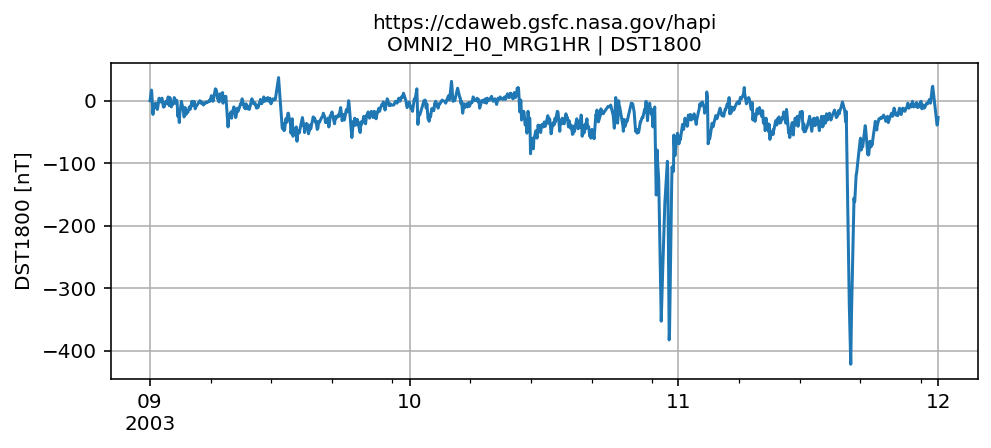


dateTimes = 


array([datetime.datetime(2003, 9, 1, 0, 30, tzinfo=<UTC>),
       datetime.datetime(2003, 9, 1, 1, 30, tzinfo=<UTC>),
       datetime.datetime(2003, 9, 1, 2, 30, tzinfo=<UTC>), ...,
       datetime.datetime(2003, 11, 30, 21, 30, tzinfo=<UTC>),
       datetime.datetime(2003, 11, 30, 22, 30, tzinfo=<UTC>),
       datetime.datetime(2003, 11, 30, 23, 30, tzinfo=<UTC>)],
      dtype=object)


DST1800 =


array([datetime.datetime(2003, 9, 1, 0, 30, tzinfo=<UTC>),
       datetime.datetime(2003, 9, 1, 1, 30, tzinfo=<UTC>),
       datetime.datetime(2003, 9, 1, 2, 30, tzinfo=<UTC>), ...,
       datetime.datetime(2003, 11, 30, 21, 30, tzinfo=<UTC>),
       datetime.datetime(2003, 11, 30, 22, 30, tzinfo=<UTC>),
       datetime.datetime(2003, 11, 30, 23, 30, tzinfo=<UTC>)],
      dtype=object)

In [32]:
from hapiclient import hapi
from hapiclient import hapiplot
from hapiclient.util import pythonshell

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'OMNI2_H0_MRG1HR' # See section 5 for information on finding list of datasets
start      = '2003-09-01T00:00:00'
stop       = '2003-12-01T00:00:00'
parameters = 'DST1800' # See section 5 for information on finding parameters in dataset
opts       = {'logging': True, 'usecache': False}

# Get parameter data. See section 5 for for information on getting available datasets and parameters
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Print meta using display() function if using IPython or Jupyter Notebook
print(meta) if pythonshell() == 'python' else display(meta)

# Plot all parameters in data. See also section 4 for information
# on using other plotting functions, e.g., Matplotlib
hapiplot(data, meta)

# Extract time values as datetime objects. See section 3 for more details.
from hapiclient import hapitime2datetime

dateTimes = hapitime2datetime(data['Time'])
print("\ndateTimes = ")
print(dateTimes) if pythonshell() == 'python' else display(dateTimes)

# Extract one of the parameters as NumPy array
BGSEc = data['DST1800']
print("\nDST1800 =")
print(dateTimes) if pythonshell() == 'python' else display(dateTimes)


## SSCWeb data

hapi(): Running hapi.py version 0.0.9b0
hapi(): hapi(): file directory = hapi-server.org_servers_SSCWeb_hapi
hapi(): Reading http://hapi-server.org/servers/SSCWeb/hapi/info?id=ace
hapi(): Writing ace.json 
hapi(): Writing ace.pkl 
hapi(): Reading http://hapi-server.org/servers/SSCWeb/hapi/capabilities
hapi(): Writing http://hapi-server.org/servers/SSCWeb/hapi/data?id=ace&parameters=X_GSE,Y_GSE,Z_GSE&time.min=2001-01-01T05:00:00&time.max=2001-01-01T06:00:00&format=binary to ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.bin
hapi(): Reading ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.bin
hapi(): Writing hapi-server.org_servers_SSCWeb_hapi/ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.pkl
hapi(): Writing hapi-server.org_servers_SSCWeb_hapi/ace_X_GSE-Y_GSE-Z_GSE_20010101T050000_20010101T060000.npy


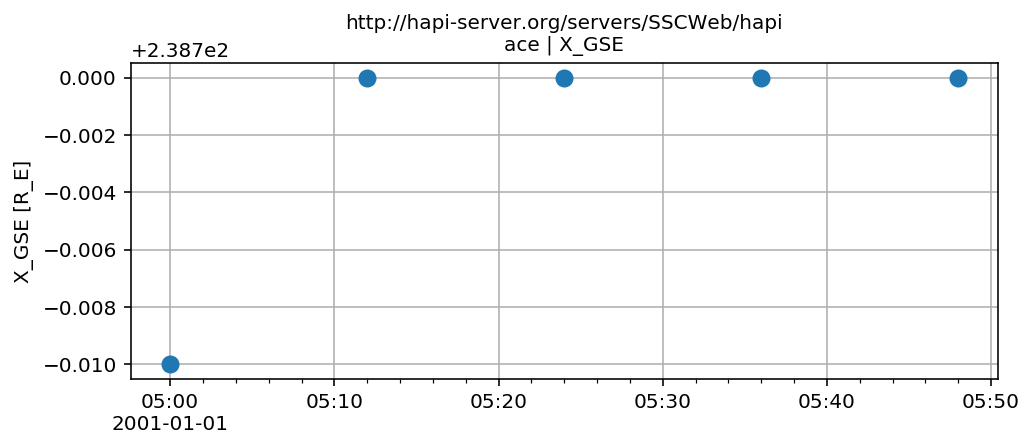

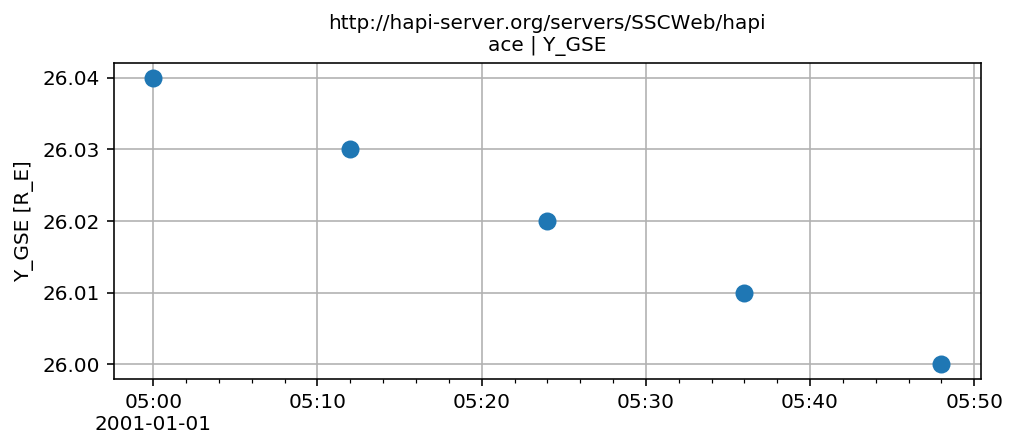

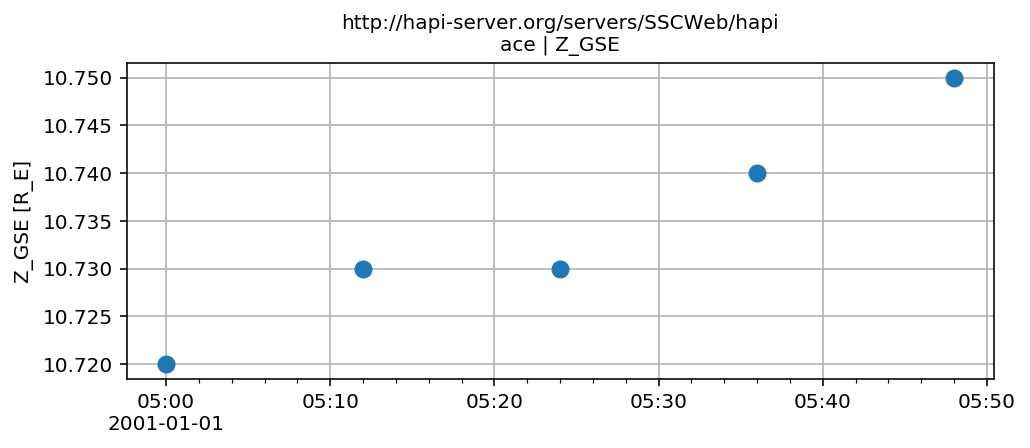

{'startDate': '1997-08-25T17:48:00.000Z',
 'stopDate': '2019-02-04T23:36:00.000Z',
 'cadence': 'PT720S',
 'description': 'Ephemeris data',
 'resourceURL': 'https://sscweb.sci.gsfc.nasa.gov/',
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'fill': None,
   'length': 18},
  {'name': 'X_GSE',
   'description': 'X Position in the Geocentric Solar Ecliptic coordinate system',
   'units': 'R_E',
   'fill': '1e31',
   'type': 'double',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'Y_GSE',
   'description': 'Y Position in the Geocentric Solar Ecliptic coordinate system',
   'units': 'R_E',
   'fill': '1e31',
   'type': 'double',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}},
  {'name': 'Z_GSE',
   'description': 'Z Position in the Geocentric Solar Ecliptic coordinate system',
   'units': 'R_E',
   'fill': '1e31',
   'type': 'double',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}}],
 'HAPI': '2.0',
 'st

In [31]:
from hapiclient import hapi
from hapiclient import hapiplot

server     = 'http://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'ace'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'X_GSE,Y_GSE,Z_GSE'
opts       = {'logging': True, 'usecache': False}

# Get parameter data. See section 5 for for information on getting available datasets and parameters
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Plot all parameters. See section 3 and 4 for information
# on extracting data and using other plotting functions.
hapiplot(data, meta)

## CDAWeb data

In [6]:
from hapiclient import hapi
from hapiclient import hapiplot

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'Magnitude,BGSEc'
opts       = {'logging': True, 'usecache': True}

# Get data
data, meta = hapi(server, dataset, parameters, start, stop, **opts)

# Plot all parameters. See section 3 and 4 for information
# on extracting data and using other plotting functions.
hapiplot(data, meta)

hapi(): Running hapi.py version 0.0.9b0
hapi(): hapi(): file directory = cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI
hapi(): Writing AC_H0_MFI.json 
hapi(): Writing AC_H0_MFI.pkl 
hapi(): Reading https://cdaweb.gsfc.nasa.gov/hapi/capabilities
hapi(): Writing https://cdaweb.gsfc.nasa.gov/hapi/data?id=AC_H0_MFI&parameters=Magnitude,BGSEc&time.min=2001-01-01T05:00:00&time.max=2001-01-01T06:00:00&format=binary to AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.bin
hapi(): Reading AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.bin
hapi(): Writing cdaweb.gsfc.nasa.gov_hapi/AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.pkl
hapi(): Writing cdaweb.gsfc.nasa.gov_hapi/AC_H0_MFI_Magnitude-BGSEc_20010101T050000_20010101T060000.npy


{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'Magnitude',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'B-field magnitude',
   'hapiplot': {'figure': <Figure size 2016x814 with 1 Axes>}},
  {'name': 'BGSEc',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'Magnetic Field Vector in GSE Cartesian coordinates (16 sec)',
   'size': [3],
   'hapiplot': {'figure': <Figure size 2016x814 with 1 Axes>}}],
 'startDate': '1997-09-02T00:00:12Z',
 'stopDate': '2019-02-15T23:59:50Z',
 'resourceURL': 'https://cdaweb.sci.gsfc.nasa.gov/misc/Notes.html#AC_H0_MFI',
 'contact': 'voycrs@gmail.com',
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'AC_H0_MFI',
 'x_parameters': 'Magnitude,BGSEc',
 'x_time.min': '2001-01-01T05:00:00',
 'x_time.max': '2001-01-01T06:00:00',
 'x_requestDate': '2019-05

## CASSINI

In [1]:
from hapiclient import hapi
from hapiclient import hapiplot

server     = 'http://datashop.elasticbeanstalk.com/hapi';
dataset    = 'CHEMS_PHA_BOX_FLUXES_FULL_TIME_RES';
parameters = 'HPlus_BEST_T1';
start      = '2004-07-01T04:00:00Z';
stop       = '2004-07-01T06:00:00Z';
opts       = {'usecache': True}

# Get parameter data. See section 5 for for information on getting available datasets and parameters
data,meta = hapi(server, dataset, parameters, start, stop, **opts)

# Plot all parameters. See section 3 and 4 for information
# on extracting data and using other plotting functions.
popts = {'logging': False, 'logy': True, 'logz': True}
hapiplot(data, meta, **popts)

heatmap() warning: Only bin centers given for x and bin separation distance is not constant. Bin width assumed based on separation distance and data pickers will not work properly.


{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Epoch',
   'type': 'isotime',
   'length': 22,
   'units': 'UTC',
   'fill': None,
   'description': 'time as UTC string to milliseconds'},
  {'name': 'HPlus_BEST_T1',
   'type': 'double',
   'units': 'particles/s/keV/cm^2/ster',
   'size': [32],
   'fill': '-1.0e38',
   'description': 'HPlus_BEST_T1',
   'bins': [{'name': 'energy',
     'units': 'keV',
     'centers': [2.809683857215968,
      3.289629854178126,
      3.7795747260769956,
      4.399504972153117,
      5.049431843039373,
      5.859340712913015,
      6.74924058228035,
      7.809121325571782,
      8.918996443546773,
      10.298841184812979,
      11.798672425319724,
      13.598469913927815,
      15.698233650637256,
      18.09796363544805,
      20.79765986836019,
      23.897311098740794,
      27.39691732658986,
      31.496456050641633,
      36.1959272708961,
      41.59531973672038,
      47.79462219748159,
      54.89382340

# Data Model

A request for data of the form
```
data, meta = hapi(server, dataset, parameters, start, stop)
```
returns the [Numpy N-D array](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html) `data` and a Python dictionary `meta` from a HAPI-compliant data server `server`. The structure of `meta` mirrors the structure of the metadata response from a HAPI server.

The basic data structure returned by all HAPI servers is a CSV file in which the first column is a time stamp and subsequent columns are data measured or associated with that time stamp. The columns are mapped to one or more parameters (that may be multi-dimensional arrays) using the metadata associated with the request for CSV data.

For more information on the HAPI server specification, see https://github.com/hapi-server/data-specification. Note that `hapi.py` requests HAPI Binary from a server if that feature is available; a HAPI compliant server is only required to serve HAPI CSV.

## Extracting Data

In [10]:
from hapiclient.hapi import hapi

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

`data` is a Numpy N-D array with named fields `Time`, `scalar`, and `vector`. The array has 10 elements (one for each time value) and each element is a list.

In [ ]:
data

Access all values for parameter `Time`

In [11]:
data['Time']

array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z',
       b'1970-01-01T00:00:02.000Z', b'1970-01-01T00:00:03.000Z',
       b'1970-01-01T00:00:04.000Z', b'1970-01-01T00:00:05.000Z',
       b'1970-01-01T00:00:06.000Z', b'1970-01-01T00:00:07.000Z',
       b'1970-01-01T00:00:08.000Z', b'1970-01-01T00:00:09.000Z'],
      dtype='|S24')

Convert elements of `Time` to Python `datetime` objects

In [12]:
from hapiclient.hapi import hapitime2datetime
dateTime = hapitime2datetime(data['Time'])
dateTime

array([datetime.datetime(1970, 1, 1, 0, 0, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 1, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 2, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 3, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 4, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 5, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 6, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 7, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 8, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 9, tzinfo=<UTC>)], dtype=object)

Access all values for parameter `vector`

In [13]:
data['vector']

array([[ 0.        , -0.70710678, -1.        ],
       [ 0.00523596, -0.7033947 , -0.99998629],
       [ 0.01047178, -0.69966334, -0.99994517],
       [ 0.01570732, -0.6959128 , -0.99987663],
       [ 0.02094242, -0.69214317, -0.99978068],
       [ 0.02617695, -0.68835458, -0.99965732],
       [ 0.03141076, -0.68454711, -0.99950656],
       [ 0.03664371, -0.68072087, -0.99932839],
       [ 0.04187565, -0.67687597, -0.99912283],
       [ 0.04710645, -0.67301251, -0.99888987]])

Access first element (all parameters at first time)

In [14]:
data[0]

(b'1970-01-01T00:00:00.000Z', 0., [ 0.        , -0.70710678, -1.        ])

Access value of `vector` at second timestep.

In [15]:
data['vector'][1] 

array([ 0.00523596, -0.7033947 , -0.99998629])

Access value of second component of `vector` at second timestep

In [16]:
data['vector'][1,1]

-0.7033947028105039

## Time Representation

A HAPI-compliant server represents time as an ISO 8601 string (with several constraints - see the [HAPI specification](https://github.com/hapi-server/data-specification/blob/master/hapi-dev/HAPI-data-access-spec-dev.md#representation-of-time)). `hapi.py` reads these into a NumPy array of [Python byte literals](https://stackoverflow.com/a/6273618). To convert byte literals to Python `datetime` objects, the function [`hapitime2datetime`](https://github.com/hapi-server/client-python/blob/master/hapiclient/hapi.py) can be used. Internally, this function uses `pandas.to_datetime` for parsing if possible. Otherwise it falls back to a manual method for parsing. The byte literals can also be converted to Astropy time objects as shown below.

In [17]:
from hapiclient.hapi import hapi
from hapiclient.hapi import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data, meta = hapi(server, dataset, parameters, start, stop)

In [18]:
data['Time']

array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z',
       b'1970-01-01T00:00:02.000Z', b'1970-01-01T00:00:03.000Z',
       b'1970-01-01T00:00:04.000Z', b'1970-01-01T00:00:05.000Z',
       b'1970-01-01T00:00:06.000Z', b'1970-01-01T00:00:07.000Z',
       b'1970-01-01T00:00:08.000Z', b'1970-01-01T00:00:09.000Z'],
      dtype='|S24')

In [19]:
hapitime2datetime(data['Time'])

array([datetime.datetime(1970, 1, 1, 0, 0, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 1, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 2, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 3, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 4, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 5, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 6, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 7, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 8, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 9, tzinfo=<UTC>)], dtype=object)

In [22]:
!pip install astropy
from astropy.time import Time
Time(data['Time'])

     |████████████████████████████████| 8.0MB 15kB/s eta 0:00:013��███████████████▊        | 5.9MB 18kB/s eta 0:01:52  | 7.3MB 21kB/s eta 0:00:32


<Time object: scale='utc' format='isot' value=['1970-01-01T00:00:00.000' '1970-01-01T00:00:01.000'
 '1970-01-01T00:00:02.000' '1970-01-01T00:00:03.000'
 '1970-01-01T00:00:04.000' '1970-01-01T00:00:05.000'
 '1970-01-01T00:00:06.000' '1970-01-01T00:00:07.000'
 '1970-01-01T00:00:08.000' '1970-01-01T00:00:09.000']>

The datetime objects are not timezone aware; all HAPI times are UTC and it seems that UTC is generally assumed by Python libraries if no timezone information is given. One known exception is when converting to Unix time.

In [ ]:
dateTimes = hapitime2datetime(data['Time'])
dateTimes[0].timestamp() # 0.0 is expected but result is given in local timezone

In [ ]:
from datetime import timezone
dateTimesUTCAware = [dt.replace(tzinfo=timezone.utc) for dt in dateTimes]
dateTimesUTCAware[0].timestamp() # 0.00
# See https://stackoverflow.com/a/41624199 for Python 2.7

## Generating Data

A HAPI response of

```
1970-01-01T00:00:00.000Z, 1.,2.,3.
1970-01-01T00:00:02.000Z, 4.,5.,6.
```

where the metadata indicates there is one parameter named `vector` with `size=[3]` and `type=double` could be created by

In [ ]:
import numpy as np
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('vector', '<f8', (3,))])

# Populate: method 1
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['vector'] = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])

# Populate: method 2
data[0] = (b'1970-01-01T00:00:00.000Z', [1.0,2.0,3.0])
data[1] = (b'1970-01-01T00:00:01.000Z', [4.0,5.0,6.0])

data

A HAPI response of

```
1970-01-01T00:00:00.000Z, 1.,2.,3.,4.,5.,6.,7.,8.,9.
1970-01-01T00:00:02.000Z, 11.,12.,13.,14.,15.,16.,17.,18.,19.
```
where the metadata indicates there is one parameter named `matrix` with `size=[3,3]` and `type=double` could be created by

In [ ]:
import numpy as np

# Allocate
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('matrix', '<f8', (3,3,))])

# Populate
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['matrix'] = np.array( [ [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]], [[11.0,12.0,13.0],[14.0,15.0,16.0],[17.0,18.0,19.0]]] )

data

Multiple parameters, e.g. a response with both the vector and matrix parameters considered above

```
1970-01-01T00:00:00.000Z, 1.,2.,3.,  1.,2.,3.,4.,5.,6.,7.,8.,9.
1970-01-01T00:00:02.000Z, 4.,5.,6., 11.,12.,13.,14.,15.,16.,17.,18.,19.
```

can be created by populating

In [ ]:
data = np.ndarray(shape=(2), dtype=[('Time', 'S24'), ('vector', '<f8', (3,)), ('matrix', '<f8', (3,3,))])
data['Time'] = np.array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z'])
data['vector'] = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])
data['matrix'] = np.array( [ [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]], [[11.0,12.0,13.0],[14.0,15.0,16.0],[17.0,18.0,19.0]]] )
data

## To Pandas DataFrame

In [ ]:
# Get data for use below
from hapiclient.hapi import hapi
from hapiclient.hapi import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data, meta = hapi(server,dataset,parameters,start,stop)

import pandas

df_Time = pandas.DataFrame(hapitime2datetime(data['Time']))
df_scalar = pandas.DataFrame(data['scalar'])
df_vector = pandas.DataFrame(data['vector'])

# Create DataFrame
df = pandas.DataFrame()

# Combine DataFrame
df = pandas.concat([df_Time, df_scalar, df_vector], axis=1)

# Name columns
df.columns = ['Time', 'scalar','vector_x', 'vector_y', 'vector_z']

# Set Time to be index
df.set_index('Time', inplace=True)

df

## To Astropy NDArray 

In [ ]:
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data, meta = hapi(server, dataset, parameters, start, stop)

dateTimes = hapitime2datetime(data['Time'])

from datetime import timezone
times = [dt.replace(tzinfo=timezone.utc).timestamp() for dt in dateTimes]

import astropy.wcs
import astropy.units as u
import numpy as np
import ndcube

my_wcs = astropy.wcs.WCS({"CTYPE1": "TIME", 
                          "CUNIT1": "s", 
                          "CDELT1": 1, 
                          "CRPIX1": 0, 
                          "CRVAL1": 0, 
                          "NAXIS1": 10})

extra_coords = [("time", 0, dateTimes)]

cube = ndcube.NDCube(data['scalar'], my_wcs, extra_coords=extra_coords)
cube

# Plotting

## hapiplot

The HAPI Python client package comes with a simple plotting function `hapiplot` that plots all of the requested variables.

Interally, `hapiplot` uses Matplotlib and the functions `timeseries.py` and  `heatmap.py` in the directory [plot](https://github.com/hapi-server/client-python/tree/master/hapiclient/plot). `hapiplot` plots all of the parameters returned by a call to `hapi` and forms calls to `timeseries.py` and  `heatmap.py` with labels extracted from `meta`.

In [ ]:
# Get data for use below
from hapiclient import hapiplot

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:59:59'

hapiplot(server, dataset, parameters, start, stop)

# or, get data and pass to hapiplot():
#
# from hapiclient.hapi import hapi
# data,meta = hapi(server,dataset,parameters,start,stop)
# hapiplot(data, meta)

## ViViz Gallery

A gallery of images for a given parameter can be visualized using [ViViz](http://viviz.org). Note that only one parameter can be plotted at a time (stack plots not implemented). This server uses `hapiplot.py` on the back-end to generate one plot of the parameter per day over the time range of available data.

In [ ]:
from hapiclient import gallery

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'vector' 
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:59:59'

# Selected dataset and first parmeter in it is shown when ViViz starts
# If comma-separated string of parameters, only first is used.
gallery(server, dataset, parameters)

## Autoplot

To view data using the [http://autoplot.org/](Autoplot) application, one can call the function `autoplot` which downloads and starts Autoplot. The first time that `autoplot` is executed, it starts an Autoplot server so that subsequent calls do not require the application to be re-launched. Closing Autoplot will close the server.

In [ ]:
from hapiclient import autoplot
    
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
start      = '2001-01-01T05:00:00'
stop       = '2001-01-01T06:00:00'
parameters = 'Magnitude,BGSEc'
opts       = {'logging': True}

autoplot(server, dataset, parameters, start, stop, **opts)

## PyTplot

https://github.com/MAVENSDC/PyTplot

First do `pip install pytplot` from the command line to install `pytplot`. After executing the following, a new window should open.

In [ ]:
# Get data for use below
from hapiclient import hapi

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'
opts       = {'usecache': True}

data,meta = hapi(server,dataset,parameters,start,stop,**opts)

from hapiclient import hapitime2datetime

if False: # ModuleNotFoundError: No module named 'PyQt5.QtWebKitWidgets'
    # Get error in Jupyter: No module named 'PyQt5.QtWebKitWidgets'
    import pytplot

    # Convert byte array to Python datetime objects.
    dateTimes = hapitime2datetime(data['Time'])

    from datetime import timezone
    # Convert dateTimes to milliseconds since 1970 (used by pyTplot)
    # Need to explicilty set timezone to UTC.
    dateTimesUnixTime = [dt.replace(tzinfo=timezone.utc).timestamp() for dt in dateTimes]

    pytplot.store_data("variable1", data={'x':dateTimesUnixTime,'y': data['scalar']})
    pytplot.tplot(0)
    # A PyTplot window should have opened.

## MatplotLib

In [ ]:
# Get data for use below
from hapiclient import hapi

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

from matplotlib import pyplot as plt
from hapiclient import hapitime2datetime
%matplotlib inline

# Convert data['Time'] elements to Python datetime objects
# Note the difference in tick labels when datetimes are used
plt.figure()
plt.plot(hapitime2datetime(data['Time']),data['scalar'])
plt.gcf().autofmt_xdate()
plt.title('scalar with Time as datetimes')

## Pandas

In [ ]:
# Get data for use below
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00'
stop       = '1970-01-01T00:00:10'

data,meta = hapi(server,dataset,parameters,start,stop)

import pandas
# Create dataframe
df = pandas.DataFrame(data['vector'])

# Add column to DataFrame
df['Time'] = hapitime2datetime(data['Time'])

# Set index
df.set_index('Time', inplace=True)

# Rename columns
df.columns = ['x', 'y', 'z']

display(df)

%matplotlib inline
df.plot()

# Metadata

The metadata returned by `hapi()` is a straightforward mapping of the JSON metadata from a HAPI server.

## Servers

Equivalent URL: https://github.com/hapi-server/data-specification/blob/master/servers.txt

In [ ]:
from hapiclient import hapi

servers = hapi() # servers is an array of URLs
display(servers)

## Server datasets

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/catalog

In [ ]:
from hapiclient import hapi

server = 'https://cdaweb.gsfc.nasa.gov/hapi'
meta = hapi(server)

display(meta)

## Dataset  parameters

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI

In [ ]:
from hapiclient import hapi

server  = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset = 'AC_H0_MFI'
meta = hapi(server,dataset)
display(meta)

## Parameters

Equivalent URL: https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc

(Except for the addition of internal keys that prefixed by `x_`.)

In [ ]:
from hapiclient import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
parameters = 'Magnitude,BGSEc'

meta = hapi(server,dataset,parameters)

display(meta)